# Group project

In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency
from statsmodels.stats.contingency_tables import mcnemar


# Attemps

In [102]:
df = pd.read_csv("AI Test - ChatGPT 3.5.csv")
df = df.drop(columns="Comments")
df = df.rename(columns={"Unnamed: 0":"Person"})
df

,ChatGPT 3.5,Gender,Attempts,Correct,Gender Guessed
0,Usain Bolt,0,13,1,0
1,Usain Bolt,0,20,1,0
2,Usain Bolt,0,13,1,0
3,Usain Bolt,0,11,1,0
4,Usain Bolt,0,9,0,0
...,...,...,...,...,...
65,Marie Curie,1,3,0,0
66,Marie Curie,1,5,0,0
67,Marie Curie,1,4,0,0
68,Marie Curie,1,25,0,0


## Amount of attemps

In [103]:
avg_attempts = df["Attempts"].mean()
avg_attempts

10.4

In [104]:
male = df[df["Gender"] == 0]
female = df[df["Gender"] == 1]

In [105]:
avg_attempts_m = male["Attempts"].mean()
avg_attempts_f = female["Attempts"].mean()

avg_attempts_m, avg_attempts_f

(10.228571428571428, 10.571428571428571)

<AxesSubplot: xlabel='Gender', ylabel='Attempts'>

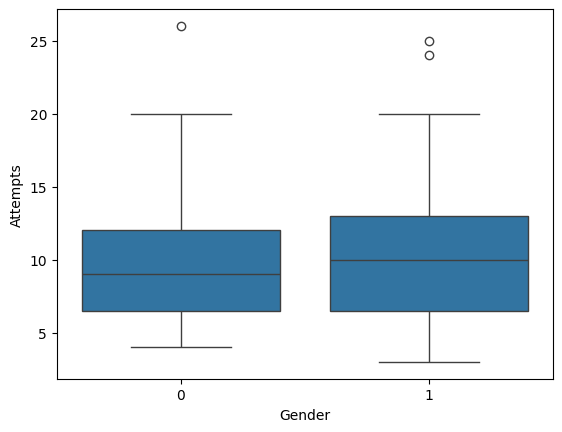

In [106]:
sns.boxplot(df,x="Gender",y="Attempts")

CoPilot

In [107]:
df = pd.read_csv("AI Test - CoPilot.csv")
df = df.drop(columns="Comments")
df = df.rename(columns={"Unnamed: 0":"Person"})
df

,Person,Gender,Attempts,Correct,Gender Guessed
0,Usain Bolt,0,10.0,1,0
1,Usain Bolt,0,16.0,1,0
2,Usain Bolt,0,13.0,1,0
3,Usain Bolt,0,6.0,0,0
4,Usain Bolt,0,14.0,1,0
...,...,...,...,...,...
65,Marie Curie,1,5.0,0,0
66,Marie Curie,1,6.0,0,0
67,Marie Curie,1,4.0,0,0
68,Marie Curie,1,3.0,0,0


In [108]:
avg_attempts_m = male["Attempts"].mean()
avg_attempts_f = female["Attempts"].mean()

avg_attempts_m, avg_attempts_f

(10.228571428571428, 10.571428571428571)

Text(0.5, 1.0, ' CoPilot - Attempts by Gender')

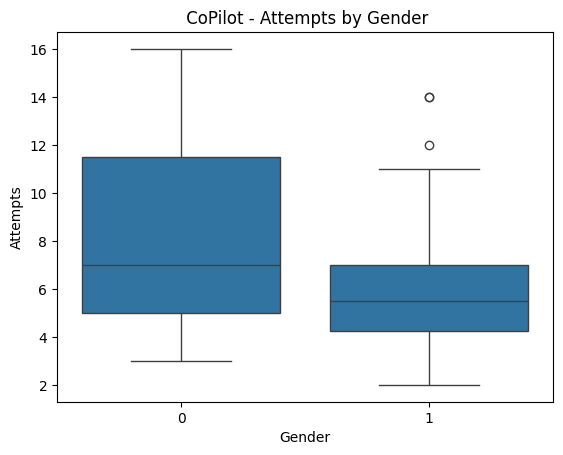

In [109]:
sns.boxplot(df,x="Gender",y="Attempts")
plt.title(" CoPilot - Attempts by Gender")

## Confusion matrix 

Text(0.5, 1.0, 'ChatGPT  3.5 - Confusion Matrix')

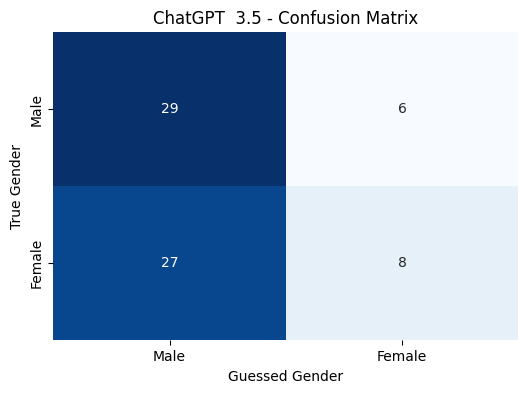

In [110]:
df = pd.read_csv("AI Test - ChatGPT 3.5.csv")
df = df.drop(columns="Comments")
df = df.rename(columns={"Unnamed: 0":"Person"})
df

cm = confusion_matrix(df["Gender"],df["Gender Guessed"])

labels = ['Male', 'Female']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels, cbar=False)

plt.xlabel('Guessed Gender')
plt.ylabel('True Gender')
plt.title('ChatGPT  3.5 - Confusion Matrix')


In [111]:
observed = cm

# Calculating expected frequencies under independence
total = observed.sum()
row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
expected = np.outer(row_totals, col_totals) / total

# Performing chi-square test
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 0.08928571428571427
P-value: 0.7650871933583798
Degrees of freedom: 1
Expected frequencies:
[[28.  7.]
 [28.  7.]]


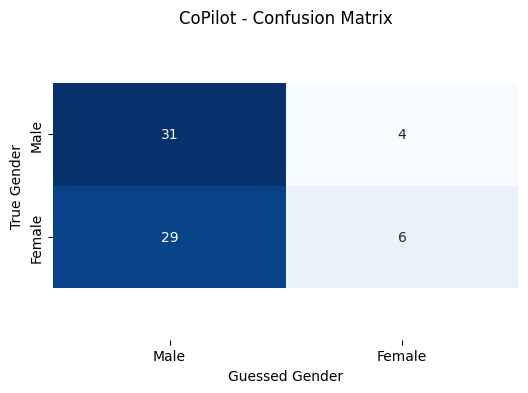

In [112]:
df = pd.read_csv("AI Test - CoPilot.csv")
df = df.drop(columns="Comments")
df = df.rename(columns={"Unnamed: 0":"Person"})
df

# Calculate confusion matrix
cm = confusion_matrix(df["Gender"],df["Gender Guessed"])

# Define class labels and tick marks
labels = ['Male', 'Female']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels, cbar=False)

# Add labels and title
plt.xlabel('Guessed Gender')
plt.ylabel('True Gender')
plt.title('CoPilot - Confusion Matrix')

# Adjust y-axis for proper alignment
bottom, top = plt.ylim() 
plt.ylim(bottom + 0.5, top - 0.5)

plt.show()


In [113]:
observed = cm

# Calculating expected frequencies under independence
total = observed.sum()
row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
expected = np.outer(row_totals, col_totals) / total

# Performing chi-square test
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 0.11666666666666667
P-value: 0.7326782613757068
Degrees of freedom: 1
Expected frequencies:
[[30.  5.]
 [30.  5.]]


Statistic: 5.0
p-value: 0.4239501953125


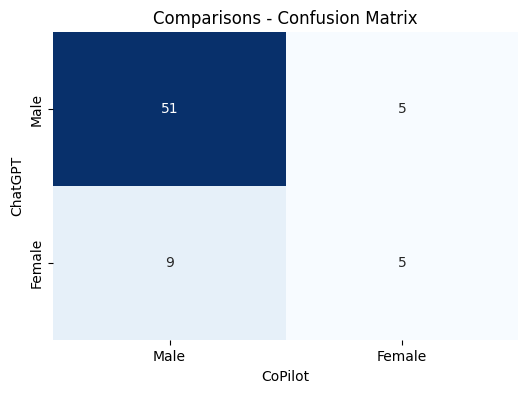

In [114]:
df_chat = pd.read_csv("AI Test - ChatGPT 3.5.csv")

df_co = pd.read_csv("AI Test - CoPilot.csv")


contingency_table = confusion_matrix(df_chat["Gender Guessed"], df_co["Gender Guessed"])


labels = ['Male', 'Female']

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels, cbar=False)

# Add labels and title
plt.xlabel('CoPilot')
plt.ylabel('ChatGPT')
plt.title('Comparisons - Confusion Matrix')


# # Perform the McNemar test
result = mcnemar(contingency_table, exact=True)

print('Statistic:', result.statistic)
print('p-value:', result.pvalue)
